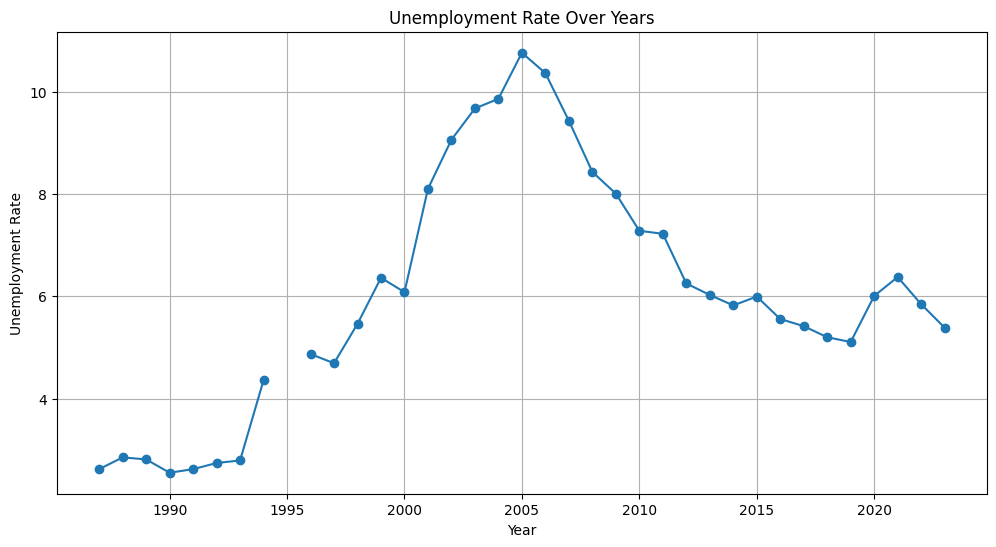

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating the DataFrame
data = {
    'Year': list(range(1987, 2024)),
    'UnemploymentRate': [
        2.62, 2.85, 2.81, 2.55, 2.62, 2.74, 2.79, 4.36, None, 4.87, 4.69, 5.46, 6.36, 6.08,
        8.1, 9.06, 9.67, 9.86, 10.76, 10.36, 9.43, 8.43, 8.005, 7.28, 7.22, 6.25, 6.025, 5.82,
        5.994, 5.555, 5.415, 5.199, 5.105, 6.005, 6.375, 5.845, 5.385
    ]
}

df = pd.DataFrame(data)

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['UnemploymentRate'], marker='o')
plt.title('Unemployment Rate Over Years')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.grid(True)
plt.show()


In [4]:
import numpy as np

# Calculate the mean and standard deviation around the missing year (1994, 1996)
mean_before_1995 = np.mean(df['UnemploymentRate'].loc[(df['Year'] >= 1992) & (df['Year'] <= 1994)])
mean_after_1995 = np.mean(df['UnemploymentRate'].loc[(df['Year'] >= 1996) & (df['Year'] <= 1998)])

std_before_1995 = np.std(df['UnemploymentRate'].loc[(df['Year'] >= 1992) & (df['Year'] <= 1994)])
std_after_1995 = np.std(df['UnemploymentRate'].loc[(df['Year'] >= 1996) & (df['Year'] <= 1998)])

(mean_before_1995, mean_after_1995, std_before_1995, std_after_1995)


(3.296666666666667, 5.006666666666667, 0.752167239086864, 0.3288701195845488)

Mean before 1995 (1992-1994): 3.30%
Mean after 1995 (1996-1998): 5.01%
Standard deviation before 1995 (1992-1994): 0.75
Standard deviation after 1995 (1996-1998): 0.33

As we noticed here, the TPT value for the missing year 1995 is actually barely significant in the grand scope, but i decided to just do an interpolation to get a placeholder value for it

In [5]:
import pandas as pd

# Create the DataFrame with the provided data
data = {
    'Year': list(range(1987, 2024)),
    'UnemploymentRate': [
        2.62, 2.85, 2.81, 2.55, 2.62, 2.74, 2.79, 4.36, None, 4.87, 4.69, 5.46, 6.36, 6.08,
        8.1, 9.06, 9.67, 9.86, 10.76, 10.36, 9.43, 8.43, 8.005, 7.28, 7.22, 6.25, 6.025, 5.82,
        5.994, 5.555, 5.415, 5.199, 5.105, 6.005, 6.375, 5.845, 5.385
    ]
}

df = pd.DataFrame(data)

# Linear interpolation for the missing value (1995)
df['UnemploymentRate'].interpolate(method='linear', inplace=True)

# Print the interpolated DataFrame
print(df[df['Year'].between(1994, 1996)])


   Year  UnemploymentRate
7  1994             4.360
8  1995             4.615
9  1996             4.870


/tmp/ipykernel_44812/3070325839.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['UnemploymentRate'].interpolate(method='linear', inplace=True)


here we got the value 4.615 from interpolating 1994 and 1996 data.